# Classification
### Workshop 4
*Jun 30 - IACS-MACI Internship*

- One-hot encoding
- Balancing data
- Weight the loss function
- Logistic regression
- F1 Score and Accuracy
- Confusion Matrix

### Loading data

In this tutorial we will use [the credit card fraud detection dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). 

This dataset contains PCA features + the `time`, and the `amount` of several transactions.

The goal is to predict the class $\in \{\text{Normal}, \text{Fraud}\}$ 

In [33]:
import pandas as pd

In [34]:
data = pd.read_csv('./data/credit_card.csv')

In [35]:
data.sample()

,Time,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,Amount,Class
6942,148122.0,-0.70557,0.16635,0.240956,0.435774,-0.083543,-0.328699,0.525426,-0.091382,-0.040253,-0.071957,95.29,Safe


### Selecting features and labels 

In [36]:
X = data.iloc[:, :-1]
X.sample() # we sample for visualizing features (or the model's input)

,Time,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,Amount
5083,33678.0,0.26903,0.017435,1.156583,1.07507,-0.149658,0.72518,-0.145275,-0.183124,-0.45265,-0.387233,24.99


In [37]:
y = data.iloc[:, -1].values
y

array(['Fraud', 'Fraud', 'Fraud', ..., 'Safe', 'Safe', 'Safe'],
      dtype=object)

### One-hot encoding (categorical vector)

Most of the algorithms need to transform **categorical** variables into **numbers**. Otherwise, the optimization method does not work. 

<img src="https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png">

The **one-encoding** is a technique to codify categorical variables into binary indicators.

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
enc = OneHotEncoder()
enc.fit(y[:,None])
y_categorical = enc.transform(y[:,None])
y_categorical = y_categorical.toarray()
y_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

### Training and testing subsets

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, \
y_one_hot_train, \
y_one_hot_test = train_test_split(X, 
                                  y_categorical, 
                                  test_size=0.5, 
                                  random_state=42) 
X_train.shape

(4746, 12)

`random_state` used for initializing the internal random number generator

### Using [logistic regression (sklearn)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn-linear-model-logisticregression)

In [42]:
from sklearn.linear_model import LogisticRegression

Labels must be a **1d array** when using `LogisticRegression`. Then, we can use [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to transform the `one-hot encoding`$\in \mathbb{Z}^C, C>1$ in a single dimension array.

In [43]:
import numpy as np

y_train = np.argmax(y_one_hot_train, axis=1)
y_test  = np.argmax(y_one_hot_test, axis=1)

y_one_hot_train.shape, y_train.shape

((4746, 2), (4746,))

In the function above, we took the index associated to the maximum value in the `axis=1`

#### Model 

In [44]:
model  = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

The `LogisticRegression` class also provides a method to get the probabilities for each class

In [87]:
y_pred_probs = model.predict_proba(X_test)

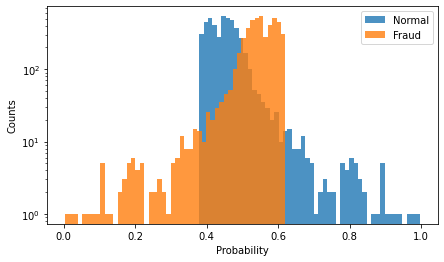

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.hist(y_pred_probs[:, 0], bins=50, label='Normal', alpha=0.8)
plt.hist(y_pred_probs[:, 1], bins=50, label='Fraud', alpha=0.8)
plt.ylabel('Counts')
plt.xlabel('Probability')
plt.yscale('log')
plt.legend()
plt.show()

### Evaluate your model

In [89]:
from sklearn.metrics import accuracy_score, f1_score

In [90]:
acc_value = accuracy_score(y_test, y_pred)
f1_value = f1_score(y_test, y_pred, average='macro')

'Accuracy: {:.2f} \n F1 Score: {:.2f}'.format(acc_value, f1_value)

'Accuracy: 0.94 \n F1 Score: 0.49'

### Balancing data

[**Imbalanced-learn**](https://imbalanced-learn.org/stable/install.html#from-pypi-or-conda-forge-repositories) is an extension to the scikit-learn package that has **adapted models** and **algorithms for working with imbalanced data**.

In this case, we will use the [`RandomOverSampler`](https://imbalanced-learn.org/stable/over_sampling.html) class that sample elements with replacement.

In [91]:
from imblearn.over_sampling import RandomOverSampler

In [92]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [93]:
uniques, counts = np.unique(y_resampled, return_counts=True)

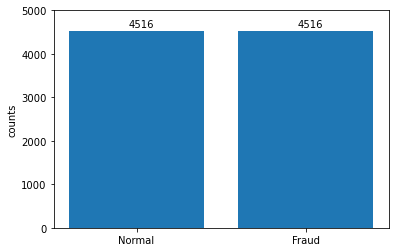

In [94]:
plt.figure()

x_plot = range(len(uniques))
plt.bar(x_plot, counts)
plt.xticks(x_plot, ['Normal', 'Fraud'])
plt.ylabel('counts')

for x, c in enumerate(counts):
    plt.text(x-0.05, c+100, '{:.0f}'.format(c))

plt.ylim(0, 5000)
plt.show()

### Training the model again

In [95]:
model  = LogisticRegression()
model.fit(X_resampled, y_resampled)

LogisticRegression()

In [96]:
y_pred_resampled = model.predict(X_test)

In [97]:
acc_value = accuracy_score(y_test, y_pred_resampled)
f1_value = f1_score(y_test, y_pred_resampled, average='macro')

'Accuracy: {:.2f} \n F1 Score: {:.2f}'.format(acc_value, f1_value)

'Accuracy: 0.83 \n F1 Score: 0.52'